Name: Kagan Hamzacebi

ID: 151101064

Course: BIL470

In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from math import sqrt
import sys
import random
import plotly_express as px

from kmeans import KMeansClusterClassifier

# Import Data
visData = pd.read_csv('iris.csv')

In [100]:
#import data
visData = pd.read_csv('iris.csv')

## Create X, y Lists

In [101]:
data = pd.DataFrame(visData)

#build train sets
X = list()
y = list()

#fetch features and label
for line in data.iterrows():
    val = list(line[1])
    X.append(list(val[:4]))
    y.append(val[-1])

#assign label values as Setosa=0 Versicolor=1 Virginica=2
for i in range(len(y)):
    if y[i] == "setosa":
        y[i] = 0
    elif y[i] == "versicolor":
        y[i] = 1
    else:
        y[i] = 2

#shuffle X,y with same order
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)

#Train data 0-120 Test data 120-150 -- 80% used for Train
X_train, X_test, y_train, y_test = X[:120], X[120:], y[:120], y[120:]

# Train the classifier

 * train the classifier
 * calculate metrics


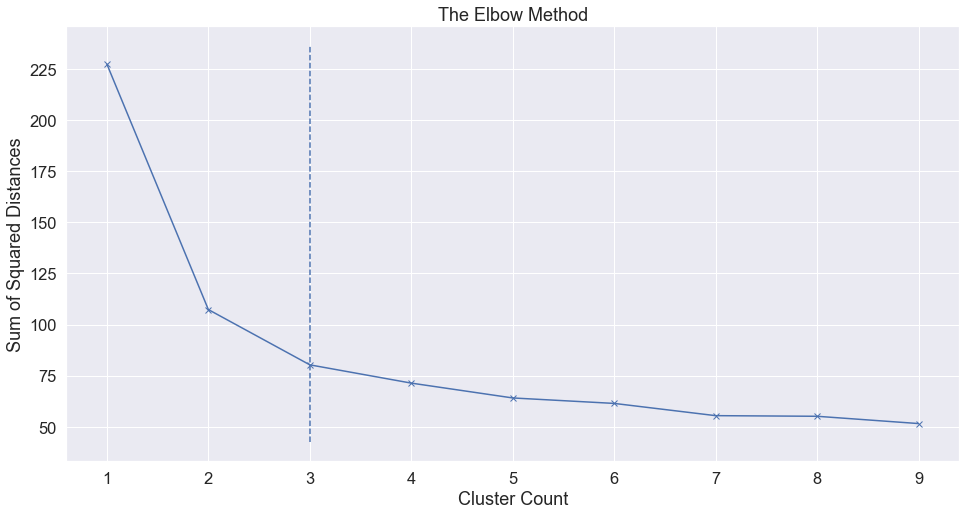

In [102]:
#Train
def euclidean_distance(a, b):
    return sqrt(((b[0] - a[0]) ** 2) + ((b[1] - a[1]) ** 2) + ((b[2] - a[2]) ** 2) + ((b[3] - a[3]) ** 2))

distances = list()
#Elbow Method
N = range(1, 10)
M = 3
for i in N:
    sum_of_squared_distances = 0
    #Inner For Loop for multiple Distance Calculation
    for _ in range(M):
        ep = KMeansClusterClassifier(n_clusters=i)
        ep.fit(X_train, y_train)
        centroids = ep.centroids

        for d in X_train:
            mindist = sys.maxsize
            for point in centroids:
                dist = euclidean_distance(d, point)
                if mindist > dist:
                    mindist = dist
            sum_of_squared_distances += mindist

    distances.append(sum_of_squared_distances / M)

#Find Elbow Point
kn = KneeLocator(N, distances, curve='convex', direction='decreasing')
elbow_point = kn.knee

plt.figure(figsize=(16,8))
plt.plot(N, distances, 'bx-')
plt.xlabel('Cluster Count')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method')
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label='elbow point')
plt.show()

## Train

In [103]:
#Train - With 3 Clusters
clf = KMeansClusterClassifier(n_clusters=elbow_point)
clf.fit(X_train, y_train)

# Results

 * Accuracy
 * Precision
 * Recall
 * F1-Score

Since the train (80%) and test (20%) datas are getting shuffled the result might differ after each run.

## 3D Plot After Clustering

In [104]:
#3D Plot After Clustering
centroids = clf.centroids
centroid_labels = clf.centroid_labels
df = data

#3D-Plot
index = 0
for line in df.iterrows():
  val = line[1]
  feature = val[:4]
  mindist = sys.maxsize
  for i in range(len(centroids)):
    dist = euclidean_distance(feature, centroids[i])
    if mindist > dist:
      mindist = dist
      if centroid_labels[i] == 0:
        df.loc[index, 'species'] = 'setosa'
      elif centroid_labels[i] == 1:
        df.loc[index, 'species'] = 'versicolor'
      else:
        df.loc[index, 'species'] = 'virginica'
  index += 1

fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species', size='petal_length', size_max=15, opacity=1, title="3D Plot After Clustering")

# tight layout

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Metrics

In [105]:
#Test
y_pred = clf.predict(X_test)

def getAccuracy(y_test, predictions):
    t = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            t = t + 1

    print('Accuracy: ' + str(format(t / len(y_test) * 100, '.1f')) + '%')

def getConfMatrixData(y_test, predictions, label=3):
    data = list()

    for lb in range(label):
        TP = 0
        TN = 0
        FP = 0
        FN = 0

        for i in range(len(predictions)):
            if predictions[i] == lb and predictions[i] == y_test[i]:
                TP = TP + 1
            if predictions[i] is not lb and y_test[i] is not lb:
                TN = TN + 1
            if predictions[i] == lb and y_test[i] is not lb:
                FP = FP + 1
            if predictions[i] is not lb and y_test[i] == lb:
                FN = FN + 1

        data.append([TP,TN,FP,FN])
    return data

def getMetrics(y_test, predictions):
    metrics = getConfMatrixData(y_test, predictions)
    print('\nSpecies     Precision     Recall     F1-Score')
    print('---------------------------------------------')

    classCount = 3
    
    for i in range(classCount):
        val = metrics[i]

        try:
            precision = val[0] / (val[0] + val[2])
            recall = val[0] / (val[0] + val[3])
            f1 = 2 * ((precision * recall) / (precision + recall))
        except:
            precision = 0.000
        
        falsePositiveRate = val[3] / (val[3] + val[0])

        if i == 0:
            print('Setosa:     ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))
        elif i == 1:
            print('Versicolor: ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))
        else:
            print('Virginica:  ' + format(precision, '.3f') + '         ' + format(recall, '.3f') + '      ' + format(f1, '.3f'))

getAccuracy(y_test, y_pred)
getMetrics(y_test, y_pred)

Accuracy: 96.7%

Species     Precision     Recall     F1-Score
---------------------------------------------
Setosa:     1.000         1.000      1.000
Versicolor: 0.900         1.000      0.947
Virginica:  1.000         0.857      0.923


## Confusion Matrix

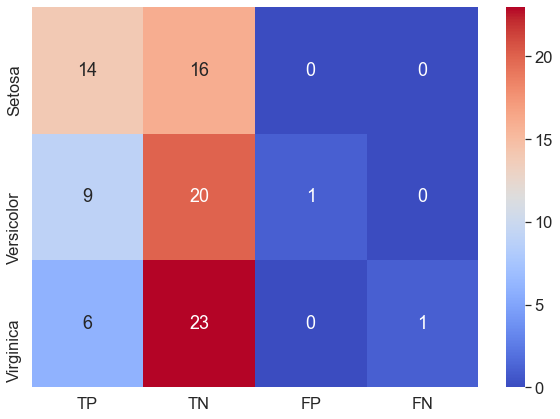

In [106]:
#Confusion Matrix
metrics = getConfMatrixData(y_test, y_pred)
cm = pd.DataFrame(metrics, range(3), range(4))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, xticklabels=['TP', 'TN', 'FP', 'FN'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap="coolwarm")

plt.show()

## ROC Curve

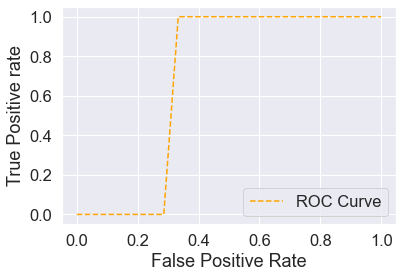

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')  

plt.show()

# Comments

The KMeans Clustering is working great if the initial centroids are well chosen. With good centroids, the accuracy is even more than 90% and sometimes 100%. On the other hand with bad initial points, the model is not working properly.
Elbow Point might differ between 2 and 4 for iris dataset. Even calculating sum of squared distances 3 times and having arithmetical avarage is not making the elbow point true for all conditions. If the initial centroids are chosen badly, the model can not predict good enough.
To fix selecting bad initial points I made a mechanism. If the our cluster size is more than 2 and our centroids are not representing different clusters that means initial centroids are not well chosen. So I rerun the algorithm with new initial points until I getting good initial centroids. This saved the algorithm and working good now.
On my personal remark, the algorithm should be enhanced with better initial points. Having full random initial centroids is decreasing the accuracy quite a lot and making the model less reliable. But if the algorithm gets good initial points model working great.

# Decision Tree vs KMeans Clustering

* If we check the best results of the algorithms, they both get 100% accuracy sometimes but Decision Tree reaches 100% more than KMeans.
* If we check the avarage results, KMeans mostly has 87-97% accuracy. Decision Tree has 90-100% accuracy. On this point Decision Three is slightly better.
* For worst results, Decision Tree does not result so bad in any condition (90% accuracy), but at KMeans, if we have bad luck with initial centroids the model results quite bad. If we enhance model with good initial centroids as my model do the results are getting much better (in worst scenario 87% accuracy with good initial points | 50% with bad initial points). 
* For having a dataset with 150 elements has a side-effect which is shuffling the dataset everytime might result with bad distribution like having no setosa in test data e.t.c. That might effect the worst case scenario's also.
* Advantages of using KMeans Clustering model are; being more visual and does not require additional data structures like a tree or graph and easy to implement.
* Advantages of using Decision Tree model are; being precise, can work in any condition for iris dataset and does not require to check if initial points are good.

* On my personal opinion, for iris dataset, Decision Tree algorithm is working slightly better regarding to points listed above. But both algorithms working good 

P.S. all results listed below belongs to my personal implemented models